<a href="https://colab.research.google.com/github/ayah96/Fraud_detection/blob/main/Fraud_detection_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
train_transaction = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/test_transaction.csv', index_col='TransactionID')
train_identity = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/test_identity.csv', index_col='TransactionID')


In [ ]:
# merge 
train_df = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test_df = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print("Train shape : "+str(train_df.shape))
print("Test shape  : "+str(test_df.shape))

Train shape : (590540, 433)
Test shape  : (506691, 432)


Text(0.5, 1.0, 'isFraud Distributions \n (0: No Fraud || 1: Fraud)')

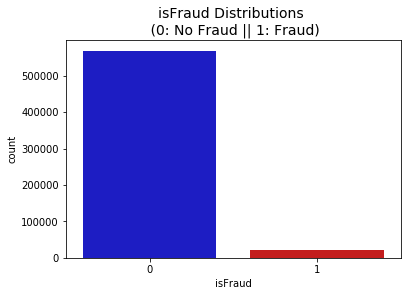

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('isFraud', data=train_df, palette=colors)
plt.title('isFraud Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(train_df['isFraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds', round(train_df['isFraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

No Frauds 96.5 % of the dataset
Frauds 3.5 % of the dataset


In [ ]:
#train_df.describe
train_df

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=433)

In [ ]:
#drop TransactionDT
train_df = train_df.drop(["TransactionDT"], axis = 1)
test_df = test_df.drop(["TransactionDT"], axis = 1)

In [ ]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [ ]:
train_df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# **Data Processing**

In [ ]:
train_df['nulls1'] = train_df.isna().sum(axis=1)
test_df['nulls1'] = test_df.isna().sum(axis=1)

In [ ]:
## **Selecting just the first set of columns**
train_df = train_df.iloc[:, :55]
test_df = test_df.iloc[:, :54]

In [ ]:
del train_transaction, train_identity, test_transaction, test_identity

In [ ]:
train_df.columns


Index(['TransactionID', 'isFraud', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'V1'],
      dtype='object')

In [ ]:
test_df.columns

Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1'],
      dtype='object')

In [ ]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other', 
          'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo',
          'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink',
          'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other',
          'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft',
          'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft',
          'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo',
          'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other',
          'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple',
          'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other',
          'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
   
    train_df[c + '_bin'] = train_df[c].map(emails)
    test_df[c + '_bin'] = test_df[c].map(emails)
    
    train_df[c + '_suffix'] = train_df[c].map(lambda x: str(x).split('.')[-1])
    test_df[c + '_suffix'] = test_df[c].map(lambda x: str(x).split('.')[-1])
    
    train_df[c + '_suffix'] = train_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test_df[c + '_suffix'] = test_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [ ]:
train_df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,2987000,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,NaN,nan,NaN,nan
1,2987001,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,google,com,NaN,nan
2,2987002,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,microsoft,com,NaN,nan
3,2987003,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,yahoo,com,NaN,nan
4,2987004,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,com,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0,T,T,T,M0,T,F,F,F,T,1.0,NaN,nan,NaN,nan
590536,3577536,0,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,F,F,M0,F,T,F,F,F,1.0,google,com,NaN,nan
590537,3577537,0,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,F,F,NaN,NaN,T,NaN,NaN,NaN,1.0,google,com,NaN,nan
590538,3577538,0,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0,T,T,T,M0,F,T,NaN,NaN,NaN,1.0,aol,com,NaN,nan


In [ ]:
for c1, c2 in train_df.dtypes.reset_index().values:
    '''print("c1 ",c1)
    print("c2 ",c2)'''
    if c2=='O': #?????
        train_df[c1] = train_df[c1].map(lambda x: str(x).lower())
        test_df[c1] = test_df[c1].map(lambda x: str(x).lower())

# ***Numerical and Categorical***




In [ ]:
numerical = ["TransactionAmt", "nulls1", "dist1", "dist2"] + ["C" + str(i) for i in range(1, 15)] + \
            ["D" + str(i) for i in range(1, 16)] + \
            ["V" + str(i) for i in range(1, 340)]
categorical = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2",
               "P_emaildomain_bin", "P_emaildomain_suffix", "R_emaildomain_bin", "R_emaildomain_suffix",
               "P_emaildomain", "R_emaildomain",
              "DeviceInfo", "DeviceType"] + ["id_0" + str(i) for i in range(1, 10)] +\
                ["id_" + str(i) for i in range(10, 39)] + \
                 ["M" + str(i) for i in range(1, 10)]

In [ ]:
numerical = [col for col in numerical if col in train_df.columns]
categorical = [col for col in categorical if col in train_df.columns]

In [ ]:
#fill numerical columns with 0's
def nan2mean(df):
    for x in list(df.columns.values):
        if x in numerical:
            #print("___________________"+x)
            #print(df[x].isna().sum())
            df[x] = df[x].fillna(0)
           #print("Mean-"+str(df[x].mean()))
    return df
train_df=nan2mean(train_df)
test_df=nan2mean(test_df)

# **OneHot transformation**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tqdm.autonotebook import tqdm

def categorical_encode(df_train, df_test, categorical_features, n_values=50):
    df_train = df_train[categorical_features].astype(str)
    df_test = df_test[categorical_features].astype(str)
    
    categories = []
    for column in tqdm(categorical_features):
        categories.append(list(df_train[column].value_counts().iloc[: n_values - 1].index) + ['Other'])
        values2use = categories[-1]
        df_train[column] = df_train[column].apply(lambda x: x if x in values2use else 'Other')
        df_test[column] = df_test[column].apply(lambda x: x if x in values2use else 'Other')
        
    
    ohe = OneHotEncoder(categories=categories)
    ohe.fit(pd.concat([df_train, df_test]))
    df_train = pd.DataFrame(ohe.transform(df_train).toarray()).astype(np.float16)
    df_test = pd.DataFrame(ohe.transform(df_test).toarray()).astype(np.float16)
    return df_train, df_test

In [ ]:
X_cat_train, X_cat_test = categorical_encode(train_df, test_df, categorical)

# **continuous_features**

In [ ]:
class ContinuousFeatureConverter:
    def __init__(self, name, feature, log_transform):
        self.name = name
        self.skew = feature.skew()
        self.log_transform = log_transform
        
    def transform(self, feature):
        if self.skew > 1:
            feature = self.log_transform(feature)
        
        mean = feature.mean()
        std = feature.std()
        return (feature - mean)/(std + 1e-6) 

In [ ]:
from tqdm.autonotebook import tqdm

feature_converters = {}
continuous_features_processed = []
continuous_features_processed_test = []

for f in tqdm(numerical):
    feature = train_df[f]
    feature_test = test_df[f]
    log = lambda x: np.log10(x + 1 - min(0, x.min()))
    converter = ContinuousFeatureConverter(f, feature, log)
    feature_converters[f] = converter
    continuous_features_processed.append(converter.transform(feature))
    continuous_features_processed_test.append(converter.transform(feature_test))
    
continuous_train = pd.DataFrame({s.name: s for s in continuous_features_processed}).astype(np.float32)
continuous_test = pd.DataFrame({s.name: s for s in continuous_features_processed_test}).astype(np.float32)

In [ ]:
target = train_df['isFraud']

In [ ]:
target

In [ ]:
X_train = pd.concat([continuous_train, X_cat_train, train_df['isFraud']], axis=1)
del continuous_train, X_cat_train
X_test = pd.concat([continuous_test, X_cat_test], axis=1)
del continuous_test, X_cat_test

In [ ]:
X_train

,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,0,1,2,3,4,5,6,...,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,isFraud
0,-0.151126,1.140222,-0.222507,-0.540096,-0.543806,-0.05987,-0.384114,-0.503780,-0.357223,-0.248319,-0.394632,-0.121747,-0.380807,0.026703,-0.319736,-0.752856,-0.429362,0.157552,-0.902928,0.909663,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,0.121253,-0.316719,-0.148966,-0.135674,-0.136507,-0.832945,0.947311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,-1.047565,-0.603380,-0.222507,-0.540096,-0.543806,-0.05987,-0.384114,-0.503780,-0.357223,-0.248319,-0.394632,-0.879674,-0.380807,-0.430044,-0.319736,-0.752856,-0.429362,-0.940182,-0.902928,-0.742863,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,-0.908438,-0.587277,-0.148966,-0.135674,-0.136507,-0.832945,-1.055614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.307960,2.692626,-0.222507,-0.540096,-0.543806,-0.05987,-0.384114,-0.503780,-0.357223,-0.248319,-0.394632,-0.121747,-0.380807,-0.430044,-0.319736,-0.752856,-0.429362,-0.940182,-0.902928,-0.742863,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,-0.908438,1.823204,-0.148966,-0.135674,-0.136507,1.176432,0.947311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,-0.481371,-0.603380,-0.222507,-0.123211,0.577311,-0.05987,-0.384114,-0.503780,0.632233,-0.248319,-0.394632,-0.121747,-0.380807,-0.430044,-0.319736,1.013560,-0.429362,0.976110,1.024667,-0.742863,0.311431,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,0.824968,-0.587277,-0.148966,-0.135674,-0.136507,0.253131,-1.055614,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-0.481371,-0.603380,-0.222507,-0.540096,-0.543806,-0.05987,-0.384114,-0.503780,-0.357223,-0.248319,0.713669,-0.879674,0.716216,-0.430044,-0.319736,-0.752856,-0.429362,-0.940182,-0.902928,-0.742863,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,-0.908438,-0.587277,-0.148966,-0.135674,-0.136507,-0.832945,-1.055614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,-0.502501,1.661771,-0.222507,-0.123211,-0.543806,-0.05987,-0.384114,0.180234,-1.105718,-0.248319,-0.394632,0.321613,-0.380807,-0.430044,-0.319736,-0.275503,0.010600,0.438526,0.483912,1.407433,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.332157,0.669055,0.305135,-0.148966,-0.135674,-0.136507,-0.174186,0.947311,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
590536,-0.727346,-0.603380,-0.222507,-0.540096,-0.543806,-0.05987,-0.384114,-0.503780,-0.357223,-0.248319,-0.394632,-0.121747,-0.380807,-0.430044,-0.319736,-0.752856,-0.429362,-0.940182,-0.902928,-0.742863,-0.653937,-0.652966,-0.174449,-0.155541,-0.311508,-0.3

In [ ]:
del train_df, test_df, numerical, categorical

# **Label Encoding**
Encode target labels with value between 0 and n_classes-1.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
category_counts = {}
for f in categorical:
    train_df[f] = train_df[f].replace("nan", "other")
    train_df[f] = train_df[f].replace(np.nan, "other")
    test_df[f] = test_df[f].replace("nan", "other")
    test_df[f] = test_df[f].replace(np.nan, "other")
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[f].values) + list(test_df[f].values))
    train_df[f] = lbl.transform(list(train_df[f].values))
    test_df[f] = lbl.transform(list(test_df[f].values))
    category_counts[f] = len(list(lbl.classes_)) + 1

In [ ]:
train_df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,2987000,0,68.50,4,12696,501,50,1,42,1,215,80,19.0,0.0,35,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,2,2,2,2,0,2,1,1,1,1.0,6,6,6,6
1,2987001,0,29.00,4,1726,304,50,2,2,1,225,80,0.0,0.0,16,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,2,2,1,1,1,0.0,4,0,6,6
2,2987002,0,59.00,4,3597,390,50,4,66,2,230,80,287.0,0.0,36,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,0.0,0.0,0.0,315.0,2,2,2,0,0,0,0,0,0,1.0,5,0,6,6
3,2987003,0,50.00,4,16830,467,50,2,17,2,376,80,0.0,0.0,55,35,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,111.0,1,1,1,0,2,0,1,1,1,0.0,8,0,6,6
4,2987004,0,50.00,1,3434,414,50,2,2,1,320,80,0.0,0.0,16,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,3,1,1,1,1,1,0.0,4,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,49.00,4,5448,501,50,4,126,2,172,80,48.0,0.0,35,35,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,56.0,0.0,0.0,0.0,56.0,2,2,2,0,2,0,0,0,2,1.0,6,6,6,6
590536,3577536,0,39.50,4,9273,125,50,2,124,2,104,80,0.0,0.0,16,35,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,0,2,0,0,0,1.0,4,0,6,6
590537,3577537,0,30.95,4,10843,495,50,2,124,2,131,80,0.0,0.0,16,35,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,3,1,2,1,1,1,1.0,4,0,6,6
590538,3577538,0,117.00,4,6701,381,50,2,124,2,287,80,3.0,0.0,2,35,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,22.0,22.0,0.0,0.0,0.0,22.0,2,2,2,0,0,2,1,1,1,1.0,0,0,6,6


# **Numerical Scaling**

In [ ]:
train_df

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for column in numerical:
    scaler = StandardScaler()
    if train_df[column].max() > 100 and train_df[column].min() >= 0:
        train_df[column] = np.log1p(train_df[column])
        test_df[column] = np.log1p(test_df[column])
    scaler.fit(np.concatenate([train_df[column].values.reshape(-1,1), test_df[column].values.reshape(-1,1)]))
    train_df[column] = scaler.transform(train_df[column].values.reshape(-1,1))
    test_df[column] = scaler.transform(test_df[column].values.reshape(-1,1))

In [ ]:
train_df

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
0,2987000,0,-0.135803,4,12696,501,50,1,42,1,215,80,1.173962,-0.230816,35,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,-0.352046,-0.268698,-0.423432,-0.120056,-0.414570,0.056842,-0.384183,-0.753515,-0.419034,0.138618,-0.911294,0.868793,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,0.063143,-0.483642,-0.13935,-0.161803,-0.14246,-0.718031,2,2,2,2,0,2,1,1,1,0.843007,6,6,6,6
1,2987001,0,-1.018900,4,1726,304,50,2,2,1,225,80,-0.614553,-0.230816,16,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,-0.352046,-0.268698,-0.423432,-0.884844,-0.414570,-0.416765,-0.384183,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,1,1,1,0,2,2,1,1,1,-1.186230,4,0,6,6
2,2987002,0,-0.290302,4,3597,390,50,4,66,2,230,80,2.766352,-0.230816,36,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,-0.352046,-0.268698,-0.423432,-0.120056,-0.414570,-0.416765,-0.384183,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,1.064971,-0.13935,-0.161803,-0.14246,0.627651,2,2,2,0,0,0,0,0,0,0.843007,5,0,6,6
3,2987003,0,-0.461133,4,16830,467,50,2,17,2,376,80,-0.614553,-0.230816,55,35,-0.106359,0.606346,-0.0824,-0.410526,-0.492574,0.666137,-0.268698,-0.423432,-0.120056,-0.414570,-0.416765,-0.384183,1.033108,-0.419034,0.949713,0.997179,-0.752546,-0.136592,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,0.745179,-0.550304,-0.13935,-0.161803,-0.14246,-0.243838,1,1,1,0,2,0,1,1,1,-1.186230,8,0,6,6
4,2987004,0,-0.461133,1,3434,414,50,2,2,1,320,80,-0.614553,-0.230816,16,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,-0.352046,-0.268698,0.709742,-0.884844,0.698677,-0.416765,-0.384183,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,1,1,1,3,1,1,1,1,1,-1.186230,4,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,-0.481948,4,5448,501,50,4,126,2,172,80,1.708945,-0.230816,35,35,-0.106359,-0.543911,-0.0824,-0.410526,0.208168,-1.122272,-0.268698,-0.423432,0.327316,-0.414570,-0.416765,-0.384183,-0.270701,0.037146,0.417030,0.461788,1.357168,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,0.594069,-0.263144,-0.13935,-0.161803,-0.14246,-0.478799,2,2,2,0,2,0,0,0,2,0.843007,6,6,6,6
590536,3577536,0,-0.703446,4,9273,125,50,2,124,2,104,80,-0.614553,-0.230816,16,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,-0.352046,-0.268698,-0.423432,-0.120056,-0.414570,-0.416765,-0.384183,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,2,0,0,0,0,2,0,0,0,0.843007,4,0,6,6
590537,3577537,0,-0.952704,4,10843,495,50,2,124,2,131,80,-0.614553,-0.230816,16,35,-0.535936,-0.543911,-0.0824,-0.410526,0.208168,-0.352046,-0.268698,-0.423432,-0.120056,-0.414570,-0.416765,-0.384183,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,2,0,0,3,1,2,1,1,1,0.843007,4,0,6,6
590538,3577538,0,0.420629,4,6701,381,50,2,124,2,287,80,0.213094,-0.230816,2,35,-0.535936,-0.543911,-0.0824,-0.410526,-0.492574,0.418180,-0.268698,-0.423432,0.327316,-0.414570,-0.416765,0.906138,0.011726,-0.419034,0.310307,0.354523,-0.752546,-0.4

# **Random Under-Sampling:**

In [ ]:
target = 'isFraud'

In [ ]:
train_df['isFraud'].value_counts()[0] #569875

569877

In [ ]:
train_df['isFraud'].value_counts()[1] #20663

20663

In [ ]:
# Lets shuffle the data before creating the subsamples

train_df = train_df.sample(frac=1) #train_df

# amount of fraud classes 492 rows.
fraud_df = train_df.loc[train_df['isFraud'] == 1]
non_fraud_df = train_df.loc[train_df['isFraud'] == 0][:20663]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix
316939,3303939,0,-0.290302,4,13814,70,50,2,2,1,199,80,-0.200730,-0.230816,16,35,0.434845,0.415454,-0.0824,-0.410526,-0.492574,0.098507,-0.268698,-0.423432,-0.120056,-0.414570,0.056842,1.660927,1.005788,0.360810,0.942540,0.989970,0.099142,0.426588,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,0.749602,0.049655,-0.13935,-0.161803,-0.14246,-0.218206,2,2,2,0,0,0,0,2,2,0.843007,4,0,6,6
115402,3102402,1,0.336752,4,1593,501,50,1,2,1,169,80,-0.614553,-0.230816,35,35,1.057586,0.907552,-0.0824,-0.410526,1.318817,1.040025,-0.268698,-0.423432,1.539477,-0.414570,1.202509,-0.384183,1.177740,1.273170,1.520510,1.570877,1.650855,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,1.390241,1.598268,-0.13935,-0.161803,-0.14246,1.276996,2,2,2,3,1,2,2,2,2,0.843007,6,6,6,6
3965,2990965,1,0.679836,2,2930,483,50,4,126,1,104,80,-0.614553,-0.230816,16,16,-0.106359,0.181821,-0.0824,0.825870,-0.492574,-0.352046,-0.268698,0.709742,-0.884844,0.698677,-0.416765,-0.384183,-1.236329,-1.198878,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,0.106398,3.380356,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,1,1,1,3,1,1,1,1,1,-1.186230,4,0,4,0
336645,3323645,0,-0.014520,4,2635,413,50,4,66,2,153,80,2.071927,-0.230816,35,35,-0.106359,-0.119385,-0.0824,-0.410526,0.208168,-0.352046,-0.268698,-0.423432,0.327316,-0.414570,0.056842,-0.384183,-0.115270,0.037146,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,1.299338,-0.483642,-0.13935,-0.161803,-0.14246,-0.718031,2,0,0,0,0,0,0,0,2,0.843007,6,6,6,6
95687,3082687,1,0.679836,1,755,58,50,4,126,2,215,80,-0.614553,2.083015,16,16,1.903580,1.966708,-0.0824,4.164681,-0.492574,1.542271,-0.268698,4.003752,-0.884844,4.038418,1.676116,-0.384183,0.119101,0.816990,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.173936,-0.182446,-0.323215,-0.338465,-0.934827,-0.550304,-0.13935,-0.161803,-0.14246,-0.718031,1,1,1,3,1,1,1,1,1,-1.186230,4,0,4,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: isFraud, dtype: float64


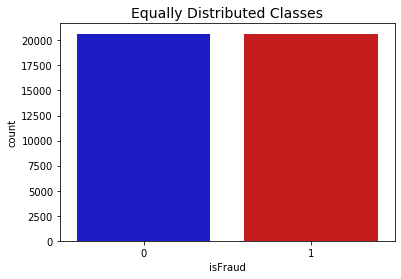

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]

sns.countplot('isFraud', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# **Random over sample**

In [ ]:
# Class count
count_class_0, count_class_1 = train_df.isFraud.value_counts()

# Divide by class
df_class_0 = train_df[train_df['isFraud'] == 0]
df_class_1 = train_df[train_df['isFraud'] == 1]

Random over-sampling:
1    569877
0    569877
Name: isFraud, dtype: int64


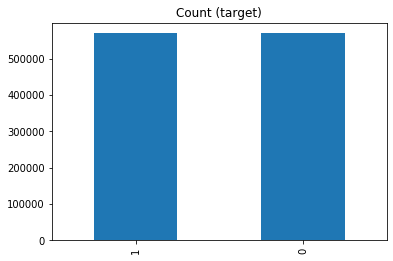

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
oversample_df = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(oversample_df.isFraud.value_counts())

oversample_df.isFraud.value_counts().plot(kind='bar', title='Count (target)');

# **Over-sampling: SMOTE**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
X = train_df.drop('isFraud', axis = 1)
y = train_df['isFraud']

#tr_df, val_df, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
val_df.columns

Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin',
       'R_emaildomain_suffix'],
      dtype='object')

In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(ratio='minority') 
X_smote, y_smote = sm.fit_sample(X,y)        #(tr_df, y_train) 

X_smote = np.array(X_smote)

y_smote = np.array(y_smote)
X_smote_df = pd.DataFrame (X_smote, columns = ['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin',
       'R_emaildomain_suffix'])



#smote_tr = pd.concat(X_train_res, y_train_res)
  
print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0))) 

Before OverSampling, counts of label '1': 13717
Before OverSampling, counts of label '0': 381944 

After OverSampling, the shape of train_X: (1139754, 58)
After OverSampling, the shape of train_y: (1139754,) 

After OverSampling, counts of label '1': 569877
After OverSampling, counts of label '0': 569877


In [ ]:
smote_tr.columns

Index(['TransactionID', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin',
       'R_emaildomain_suffix'],
      dtype='object')

# **Features Importances**

In [ ]:
y = oversample_df['isFraud']
X = oversample_df.drop('isFraud', axis=1)


In [ ]:
oversample_df .columns

Index(['TransactionID', 'isFraud', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'V1', 'P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin',
       'R_emaildomain_suffix'],
      dtype='object')

In [ ]:
# Create a random forest classifier
feat_labels = ['TransactionID', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'V1', 'P_emaildomain_bin', 'P_emaildomain_suffix', 'R_emaildomain_bin',
       'R_emaildomain_suffix']
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('TransactionID', 0.0604318157798992)
('TransactionAmt', 0.05728725781337933)
('ProductCD', 0.006103006792003653)
('card1', 0.048989845037587326)
('card2', 0.039754423788122634)
('card3', 0.015855119552677824)
('card4', 0.008998799115287734)
('card5', 0.02102447858107692)
('card6', 0.01512788620589926)
('addr1', 0.03468947030391609)
('addr2', 0.0018721483352317184)
('dist1', 0.014721003934955287)
('dist2', 0.005238862579458133)
('P_emaildomain', 0.018291547057546508)
('R_emaildomain', 0.006525726901474381)
('C1', 0.03454981977738861)
('C2', 0.025854417157443466)
('C3', 0.00022382784186432718)
('C4', 0.03020750448941678)
('C5', 0.025866644710425556)
('C6', 0.0194760023815347)
('C7', 0.012894040943091633)
('C8', 0.02213243208595083)
('C9', 0.021376178267429703)
('C10', 0.009880967453138965)
('C11', 0.013889551285826935)
('C12', 0.026010578342711872)
('C13', 0.047073745489825417)
('C14', 0.03189548614549852)
('D1', 0.030331404423903675)
('D2', 0.025557147396491404)
('D3', 0.01856687764394

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.01)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
   

In [ ]:
# Print the names of the most important features
FS = []
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    FS.append(feat_labels[feature_list_index])

TransactionID
TransactionAmt
card1
card2
card5
card6
addr1
dist1
P_emaildomain
C1
C2
C5
C6
C8
C9
C10
C11
C13
C14
D1
D2
D3
D4
D5
D8
D10
D11
D15
M4
P_emaildomain_bin
R_emaildomain_bin
R_emaildomain_suffix


In [ ]:
len (FS)

34

In [ ]:
X_important_train = sfm.transform(X)
X_important_test = sfm.transform(test_df)

In [ ]:
X_important_train = pd.DataFrame(X_important_train , columns= FS)

In [ ]:
X_important_test = pd.DataFrame(X_important_test , columns= FS) 

In [ ]:
numerical = [col for col in numerical if col in FS]
categorical = [col for col in categorical if col in FS]

In [ ]:
X_important_train.head()

,TransactionID,TransactionAmt,card1,card2,card4,card5,card6,addr1,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C8,C9,C10,C11,C13,C14,D1,D2,D3,D4,D5,D8,D9,D10,D11,D15,M4,M5,P_emaildomain_bin,R_emaildomain_bin,R_emaildomain_suffix
0,2987000.0,-0.135803,12696.0,501.0,1.0,42.0,1.0,215.0,1.173962,35.0,35.0,-0.535936,-0.543911,-0.410526,-0.492574,-0.352046,-0.423432,-0.120056,-0.414570,0.056842,-0.753515,-0.419034,0.138618,-0.911294,0.868793,-0.589061,-0.676684,-0.323215,-0.338465,0.063143,-0.483642,-0.718031,2.0,0.0,6.0,6.0,6.0
1,2987001.0,-1.018900,1726.0,304.0,2.0,2.0,1.0,225.0,-0.614553,16.0,35.0,-0.535936,-0.543911,-0.410526,-0.492574,-0.352046,-0.423432,-0.884844,-0.414570,-0.416765,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.323215,-0.338465,-0.934827,-0.550304,-0.718031,0.0,2.0,4.0,6.0,6.0
2,2987002.0,-0.290302,3597.0,390.0,4.0,66.0,2.0,230.0,2.766352,36.0,35.0,-0.535936,-0.543911,-0.410526,-0.492574,-0.352046,-0.423432,-0.120056,-0.414570,-0.416765,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.323215,-0.338465,-0.934827,1.064971,0.627651,0.0,0.0,5.0,6.0,6.0
3,2987003.0,-0.461133,16830.0,467.0,2.0,17.0,2.0,376.0,-0.614553,55.0,35.0,-0.106359,0.606346,-0.410526,-0.492574,0.666137,-0.423432,-0.120056,-0.414570,-0.416765,1.033108,-0.419034,0.949713,0.997179,-0.752546,-0.136592,-0.676684,-0.323215,-0.338465,0.745179,-0.550304,-0.243838,0.0,2.0,8.0,6.0,6.0
4,2987004.0,-0.461133,3434.0,414.0,2.0,2.0,1.0,320.0,-0.614553,16.0,35.0,-0.535936,-0.543911,-0.410526,-0.492574,-0.352046,0.709742,-0.884844,0.698677,-0.416765,-0.753515,-0.419034,-0.949108,-0.911294,-0.752546,-0.589061,-0.676684,-0.323215,-0.338465,-0.934827,-0.550304,-0.718031,3.0,1.0,4.0,6.0,6.0


# **Machine learning Model**

In [ ]:
y = oversample_df['isFraud']
X = oversample_df.drop('isFraud', axis=1)


In [ ]:
len(X)

1139754

In [ ]:
len(oversample_df.columns)

59

In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_valid = X_valid.values
Y_train = Y_train.values
Y_valid = Y_valid.values

In [ ]:
# ----------DT--------------
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#DT = DecisionTreeClassifier(random_state = 1, max_depth = 10, min_samples_split = 2)
DT.fit(X_train_sm, y_train_sm)
predictions =  DT.predict(val_df)

acc = round(DT.score(X_train_sm, y_train_sm) * 100, 2)
Precision = round(precision_score(y_valid, predictions) * 100, 2)
Recall = round(recall_score(y_valid, predictions) * 100, 2)
F1_score = round(f1_score(y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)


acc  100.0
Precision  52.28
Recall  61.14
F1_score  56.37


In [ ]:
#----------------GradientBoostingClassifier------------
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(learning_rate=0.025, n_estimators=300, max_depth=3, subsample=0.5)
GBC.fit(X_train_sm, y_train_sm)
predictions =  GBC.predict(val_df)

acc = round(GBC.score(X_train_sm, y_train_sm) * 100, 2)
Precision = round(precision_score(y_valid, predictions) * 100, 2)
Recall = round(recall_score(y_valid, predictions) * 100, 2)
F1_score = round(f1_score(y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)


acc  94.81
Precision  36.81
Recall  44.5
F1_score  40.29


In [ ]:
# Polunomial SVM (Degree 3)
poly_D3_svc = SVC(kernel='poly', degree=3, coef0=1, C=5)
poly_D3_svc.fit(X_train, Y_train)

predictions=poly_D3_svc.predict(X_valid)

acc = round(poly_D3_svc.score(X_train, Y_train) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, Y_train)

acc_NB = round(NB.score(X_train, Y_train) * 100, 2)
predictions = NB.predict(X_valid)
#predictions = cross_val_predict(NB, X_train, Y_train, cv=3)
NB_Precision = round(precision_score(Y_valid, predictions) * 100, 2)
NB_Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc_NB ", acc_NB)
print("NB_Precision ", NB_Precision)
print("NB_Recall ", NB_Precision)
print("F1_score ", F1_score)

acc_NB  64.55
NB_Precision  75.58
NB_Recall  75.58
F1_score  54.94


In [ ]:
#------------linear SVM--------------

svm_clf=svm.SVC(kernel='linear')
svm_clf.fit(X_train,Y_train)
predictions=svm_clf.predict(X_valid)
acc = round(svm_clf.score(X_train, Y_train) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)

In [ ]:
# ------------- Logistic Regression -------------
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
predictions=log_reg.predict(X_valid)
acc = round(log_reg.score(Y_valid, predictions) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)

acc  74.8
Precision  75.72
Recall  73.3
F1_score  74.49


In [ ]:

# -------------- Voting Classifier ----------
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier

Logistic_Regression = LogisticRegression()
linear_SVM = LinearSVC()
Gaussian_NB = GaussianNB()
AdaBoost_Classifier = AdaBoostClassifier(n_estimators=200)
RandomForestClassifier = RandomForestClassifier(criterion = "gini", n_estimators=100)

VC = VotingClassifier(estimators=[('lr', Logistic_Regression), ('lsvm', linear_SVM), ('nb', Gaussian_NB), ('adb', AdaBoost_Classifier), ('rf', RandomForestClassifier)], voting='hard')
VC.fit(X_train, Y_train)

predictions= VC.predict(X_valid)
acc = round(VC.score(Y_valid, predictions) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)


acc  83.8
Precision  83.33
Recall  84.57
F1_score  83.95


In [ ]:
#-------------AdaBoostClassifier-------------------------

ABC = AdaBoostClassifier(algorithm="SAMME.R", n_estimators=100, learning_rate=0.15)
ABC.fit(X_train, Y_train)

predictions= ABC.predict(X_valid)
acc = round(ABC.score(X_train, Y_train) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)

acc  76.92
Precision  79.82
Recall  72.03
F1_score  75.73


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 15,   
                                       n_estimators=100, 
                                       max_features='sqrt',
                                       max_depth=5,
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=1)
RF.fit(X_train, Y_train)

predictions= RF.predict(X_valid)
acc = round(RF.score(X_train, Y_train) * 100, 2)
Precision = round(precision_score(Y_valid, predictions) * 100, 2)
Recall = round(recall_score(Y_valid, predictions) * 100, 2)
F1_score = round(f1_score(Y_valid, predictions) * 100, 2)

print("acc ", acc)
print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)
print(classification_report(Y_valid, predictions))


acc  77.81
Precision  83.22
Recall  69.76
F1_score  75.9
              precision    recall  f1-score   support

           0       0.74      0.86      0.80    188210
           1       0.83      0.70      0.76    187909

    accuracy                           0.78    376119
   macro avg       0.79      0.78      0.78    376119
weighted avg       0.79      0.78      0.78    376119



In [ ]:
predictions = DT.predict(test_df)

In [ ]:
sample_submission = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/submission_IEEENEW.csv', index_col='TransactionID')
sample_submission['isFraud'] = predictions
sample_submission.to_csv('drive/My Drive/Colab Notebooks/fraud_dataset/submission_IEEENEW.csv')

# Neural Network Model 

In [ ]:
from keras.layers import Concatenate, Input, Dense, Embedding, Flatten, Dropout, BatchNormalization,GRU, SpatialDropout1D,RepeatVector, LSTM, Bidirectional, Conv1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import  Adam, Nadam, RMSprop, sgd
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
import keras.backend as k
def make_model():
    k.clear_session()

    categorical_inputs = []
    for cat in categorical:
        categorical_inputs.append(Input(shape=[1], name=cat))

    categorical_embeddings = []
    for i, cat in enumerate(categorical):
        categorical_embeddings.append(
            Embedding(category_counts[cat], int(np.log1p(category_counts[cat]) + 1), name = cat + "_embed")(categorical_inputs[i]))

    categorical_logits = Concatenate(name = "categorical_conc")([Flatten()(SpatialDropout1D(.1)(cat_emb)) for cat_emb in categorical_embeddings])
    
    categorical_logits = RepeatVector(1)(categorical_logits)
    categorical_logits = Flatten()(categorical_logits)
    categorical_logits = Dropout(.5)(categorical_logits)
    
    categorical_logits = RepeatVector(1)(categorical_logits)
    categorical_logits = SpatialDropout1D(0.35)(categorical_logits)

    '''
    categorical_logits = Bidirectional(GRU(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(categorical_logits)
    categorical_logits = GlobalMaxPooling1D()(categorical_logits)
    '''

    x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(categorical_logits)
    max_pool1 = GlobalMaxPooling1D()(x)

    y = Bidirectional(GRU(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(categorical_logits)
    max_pool2 = GlobalMaxPooling1D()(y)
    
    categorical_logits = concatenate([max_pool1, max_pool2])

    numerical_inputs = Input(shape=[tr_df[numerical].shape[1]], name = 'numerical')
    numerical_logits = Dropout(.1)(numerical_inputs)
  
    x = Concatenate()([
        categorical_logits, 
        numerical_logits,
    ])
    
    x = BatchNormalization()(x)
    x = Dense(200, activation = 'relu')(x)
    x = Dropout(.2)(x)
    x = Dense(100, activation = 'relu')(x)
    x = Dropout(.2)(x)
    out = Dense(1, activation = 'sigmoid')(x)
    

    model = Model(inputs=categorical_inputs + [numerical_inputs],outputs=out)
    loss = "binary_crossentropy"
    #opt = RMSprop(lr = 0.01, rho = 0.9, epsilon = None, decay = 0.01)
    model.compile(optimizer= Nadam(lr = 0.01) , loss = loss) #Nadam(lr = 0.01) #sgd
    return model

In [ ]:
def get_input_features(df ):
    X = {'numerical':np.array(df[numerical])}
    for cat in categorical:
        X[cat] = np.array(df[cat])
    return X

In [ ]:
from sklearn.model_selection import train_test_split,KFold

tr_df, val_df = train_test_split(oversample_df, test_size=0.33, random_state=42)

In [ ]:
# when used FI
from sklearn.model_selection import train_test_split

tr_df, X_valid, y_train, y_valid = train_test_split(X_smote_df, y_smote, test_size=0.33, random_state=42)  #X_smote_df, y    #X_important_train

In [ ]:
len(tr_df.columns)

59

**train the NN with all categorical and numerical features**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
early_stop = EarlyStopping(patience= 5, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose= 1 , save_best_only=True)

In [ ]:
X_train = get_input_features (tr_df)  #tr_df #X_train_sm
X_valid = get_input_features(X_valid)    #val_df #X_valid

Y_train = y_train                  #y_train     #tr_df['isFraud']       #y_train_sm 
Y_valid = y_valid                                      #Y_valid   #val_df['isFraud']     #y_valid
model = make_model()


model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), batch_size = 9000, epochs =500, verbose = 1, callbacks=[early_stop, checkpoint]) #



Train on 763635 samples, validate on 376119 samples
Epoch 1/500
763635/763635 [==============================] - 29s 37us/step - loss: 0.2457 - val_loss: 0.2234

Epoch 00001: val_loss did not improve from 0.19130
Epoch 2/500
763635/763635 [==============================] - 22s 28us/step - loss: 0.1748 - val_loss: 0.1975

Epoch 00002: val_loss did not improve from 0.19130
Epoch 3/500
763635/763635 [==============================] - 21s 28us/step - loss: 0.1614 - val_loss: 0.1320

Epoch 00003: val_loss improved from 0.19130 to 0.13202, saving model to best_model.h5
Epoch 4/500
763635/763635 [==============================] - 22s 28us/step - loss: 0.1517 - val_loss: 0.1298

Epoch 00004: val_loss improved from 0.13202 to 0.12981, saving model to best_model.h5
Epoch 5/500
763635/763635 [==============================] - 22s 28us/step - loss: 0.1452 - val_loss: 0.1310

Epoch 00005: val_loss did not improve from 0.12981
Epoch 6/500
763635/763635 [==============================] - 22s 28us/ste

In [ ]:
'''valid_preds = model.predict(X_valid, batch_size = 8000, verbose = True)
score = roc_auc_score(Y_valid, valid_preds)
print(score)
Precision = round(precision_score(Y_valid, valid_preds.round()) * 100, 2)
Recall = round(recall_score(Y_valid, valid_preds.round()) * 100, 2)
F1_score = round(f1_score(Y_valid, valid_preds.round()) * 100, 2)

print("Precision ", Precision)
print("Recall ", Recall)
print("F1_score ", F1_score)

'''
'''for i in range(100):
    if patience < 3:
        hist = model.fit(X_train, y_train, validation_data = (X_valid,y_valid), batch_size = 8000, epochs =5, verbose = 1)
        valid_preds = model.predict(X_valid, batch_size = 8000, verbose = True)
        score = roc_auc_score(y_valid, valid_preds)
        print(score)
        if score > best_score:
            model.save_weights("model.h5")
            best_score = score
            patience = 0
        else:
            patience += 1
   '''         

# **prediction**

In [ ]:
from keras.engine.saving import load_model
model1 = load_model('best_model.h5')
X_test = get_input_features(test_df)   #X_important_test
predictions = model1.predict(X_test, batch_size = 2000, verbose = True)


506691/506691 [==============================] - 8s 15us/step


In [ ]:
sample_submission = pd.read_csv('drive/My Drive/Colab Notebooks/fraud_dataset/submission_IEEENEW.csv', index_col='TransactionID')
sample_submission['isFraud'] = predictions
sample_submission.to_csv('drive/My Drive/Colab Notebooks/fraud_dataset/submission_IEEENEW.csv')

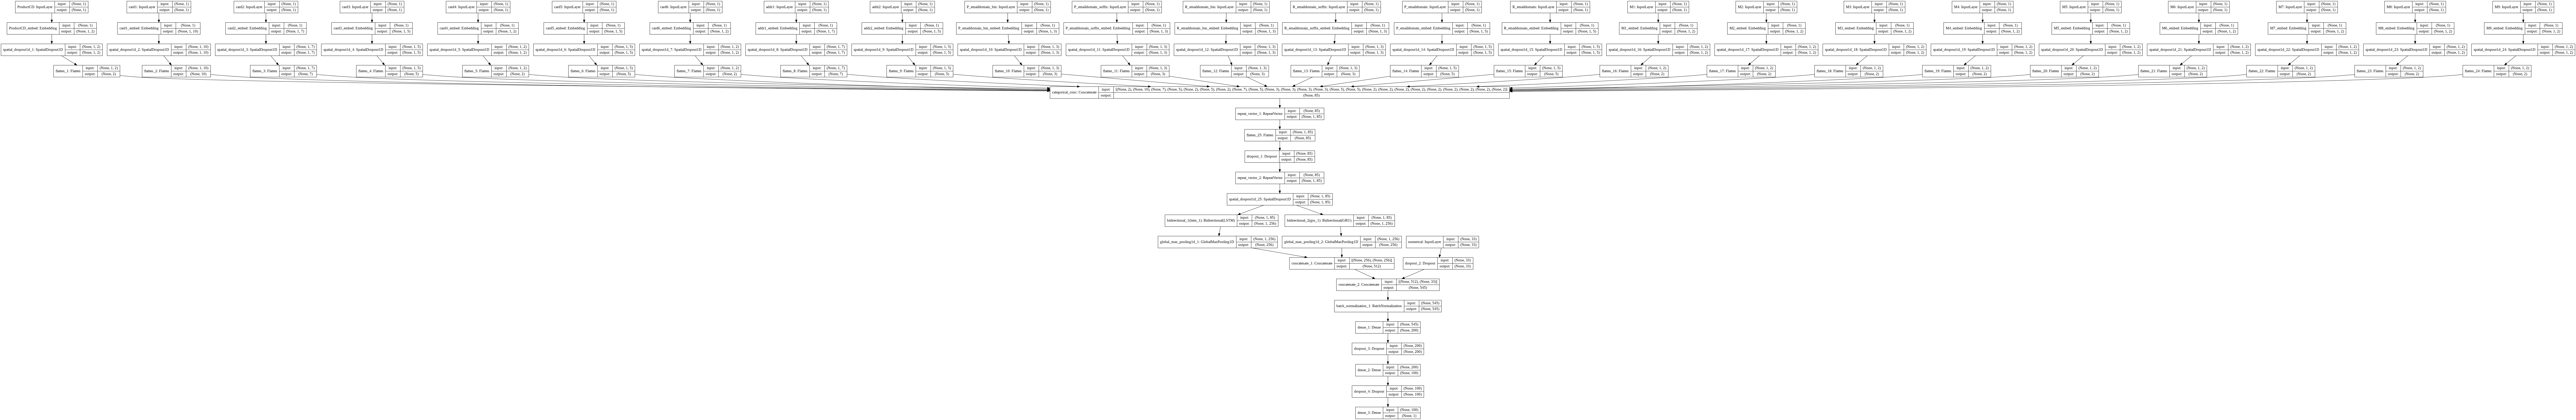

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='drive/My Drive/Colab Notebooks/fraud_dataset/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ProductCD (InputLayer)          (None, 1)            0                                            
__________________________________________________________________________________________________
card1 (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
card2 (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
card3 (InputLayer)              (None, 1)            0                                            
____________________________________________________________________________________________

# **NN model**

In [ ]:
from keras.layers import Concatenate, Input, Dense, Embedding, Flatten, Dropout, BatchNormalization, SpatialDropout1D,RepeatVector, LSTM, Bidirectional, Conv1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model
from keras.optimizers import  Adam, Nadam, RMSprop, sgd
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
import keras.backend as k
def make_model():
    k.clear_session()

    categorical_inputs = []
    for cat in categorical:
        categorical_inputs.append(Input(shape=[1], name=cat))

    categorical_embeddings = []
    for i, cat in enumerate(categorical):
        categorical_embeddings.append(
            Embedding(category_counts[cat], int(np.log1p(category_counts[cat]) + 1), name = cat + "_embed")(categorical_inputs[i]))

    categorical_logits = Concatenate(name = "categorical_conc")([Flatten()(SpatialDropout1D(.1)(cat_emb)) for cat_emb in categorical_embeddings])
    categorical_logits = RepeatVector(1)(categorical_logits)
    #categorical_logits = Flatten()(categorical_logits)
    #categorical_logits = Dropout(.5)(categorical_logits)
    categorical_logits = SpatialDropout1D(0.35)(categorical_logits)

    categorical_logits = Bidirectional(LSTM(128, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(categorical_logits)
    #categorical_logits = Conv1D(64, kernel_size=2, padding='valid', kernel_initializer='glorot_uniform')(categorical_logits)

    #avg_pool = GlobalAveragePooling1D()(categorical_logits)
    categorical_logits = GlobalMaxPooling1D()(categorical_logits)
    #categorical_logits = concatenate([avg_pool, max_pool])

    numerical_inputs = Input(shape=[tr_df[numerical].shape[1]], name = 'numerical')
    numerical_logits = Dropout(.1)(numerical_inputs)
  
    x = Concatenate()([
        categorical_logits, 
        numerical_logits,
    ])
    #x = categorical_logits
    #x = BatchNormalization()(x)
    x = Dense(200, activation = 'relu')(x)
    x = Dropout(.2)(x)
    x = Dense(100, activation = 'relu')(x)
    x = Dropout(.2)(x)
    out = Dense(1, activation = 'sigmoid')(x)
    

    model = Model(inputs=categorical_inputs + [numerical_inputs],outputs=out)
    loss = "binary_crossentropy"
    #opt = RMSprop(lr = 0.01, rho = 0.9, epsilon = None, decay = 0.01)
    model.compile(optimizer= sgd(lr = 0.01) , loss = loss) #Nadam(lr = 0.01) #sgd
    return model